In [24]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [25]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [26]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [27]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [28]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

butaritari ki
longyearbyen sj
sentyabrskiy ru
rochegda ru
tiznit ma
malakal sd
mataura pf
arraial do cabo br
tessalit ml
new norfolk au
bredasdorp za
vaini to
carnarvon au
busselton au
kaitangata nz
georgetown sh
hithadhoo mv
hasaki jp
hobart au
lishu cn
husavik is
barrow us
arraial do cabo br
saldanha za
kapaa us
vaini to
kamaishi jp
lebu cl
broome au
naryan-mar ru
kapaa us
punta arenas cl
castro cl
bengkulu id
morant bay jm
butaritari ki
nicoya cr
emborion gr
sao joao da barra br
port alfred za
castro cl
port blair in
gushi cn
marsh harbour bs
kruisfontein za
ribeira grande pt
rungata ki
korsakov ru
punta arenas cl
hami cn
katsuura jp
mar del plata ar
punta arenas cl
saskylakh ru
atuona pf
te anau nz
mataura pf
aklavik ca
amderma ru
kodiak us
new norfolk au
muravlenko ru
chokurdakh ru
torbay ca
punta arenas cl
illoqqortoormiut gl
waipawa nz
berlevag no
nanortalik gl
akola in
cape town za
barrow us
qui nhon vn
winneba gh
thompson ca
sao filipe cv
umzimvubu za
victoria sc
nuuk gl
huazo

kapaa us
mataura pf
coihaique cl
albany au
odessa us
cape town za
mahebourg mu
tilichiki ru
port alfred za
bluff nz
albany au
saint-philippe re
kodiak us
bluff nz
lebu cl
pierre us
tuatapere nz
busselton au
komsomolskiy ru
roma au
cape town za
lavrentiya ru
cidreira br
saldanha za
sao filipe cv
vaini to
saint-philippe re
broken hill au
basco ph
amderma ru
thohoyandou za
vestmannaeyjar is
rikitea pf
agde fr
lorengau pg
jamestown sh
grindavik is
margate za
saint-pierre pm
barrow us
kashan ir
strathmore ca
sola vu
arraial do cabo br
nanortalik gl
beloha mg
malanje ao
rikitea pf
thinadhoo mv
jieshi cn
savannakhet la
albany au
alofi nu
lyantonde ug
derzhavinsk kz
doctor pedro p. pena py
east london za
shizuishan cn
bonthe sl
kaitangata nz
hamilton bm
karibib na
rikitea pf
chokurdakh ru
guaiba br
pousat kh
vaitupu wf
skalistyy ru
coihaique cl
bhilwara in
hasaki jp
agen fr
atuona pf
busselton au
ushuaia ar
pisco pe
iqaluit ca
norman wells ca
hovd mn
hovd mn
mataura pf
taolanaro mg
ponta do so

bambous virieux mu
guarapari br
bredasdorp za
mayskiy ru
taolanaro mg
atar mr
butaritari ki
iqaluit ca
ushuaia ar
esperance au
ancud cl
qaanaaq gl
constitucion cl
koslan ru
cape town za
carnarvon au
college us
high level ca
bredasdorp za
punta arenas cl
punta arenas cl
busselton au
esperance au
puerto ayora ec
kaputa zm
bredasdorp za
tyup kg
asfi ma
kapaa us
kapaa us
ilebo cd
hami cn
la ronge ca
mutsamudu km
avarua ck
cape town za
hobart au
shache cn
yellowknife ca
vaini to
katsuura jp
nikel ru
dikson ru
ushuaia ar
ushuaia ar
carnarvon au
atuona pf
busselton au
isangel vu
yellowknife ca
mys shmidta ru
hamilton bm
rikitea pf
ushuaia ar
belushya guba ru
nanortalik gl
moose jaw ca
arraial do cabo br
longyearbyen sj
vao nc
codrington ag
albany au
ransang ph
mataura pf
rikitea pf
touros br
vitoria da conquista br
chapais ca
mahebourg mu
yellowknife ca
sibolga id
cidreira br
kapaa us


In [29]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [30]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a8bd4cd659722226d297e54e350616cb


In [31]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [32]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [33]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | butaritari
Processing Record 2 of Set 13 | longyearbyen
Processing Record 3 of Set 13 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 13 | rochegda
Processing Record 5 of Set 13 | tiznit
Processing Record 6 of Set 13 | malakal
Processing Record 7 of Set 13 | mataura
Processing Record 8 of Set 13 | arraial do cabo
Processing Record 9 of Set 13 | tessalit
Processing Record 10 of Set 13 | new norfolk
Processing Record 11 of Set 13 | bredasdorp
Processing Record 12 of Set 13 | vaini
Processing Record 13 of Set 13 | carnarvon
Processing Record 14 of Set 13 | busselton
Processing Record 15 of Set 13 | kaitangata
Processing Record 16 of Set 13 | georgetown
Processing Record 17 of Set 13 | hithadhoo
Processing Record 18 of Set 13 | hasaki
Processing Record 19 of Set 13 | hobart
Processing Record 20 of Set 13 | lishu
Processing Record 21 of Set 13 | husavik
Processing Record 22 of Set 13 | barrow
Processing Record 23 of Set 13 | saldanha
Pro

Processing Record 33 of Set 16 | alekseyevka
Processing Record 34 of Set 16 | galiwinku
City not found. Skipping...
Processing Record 35 of Set 16 | mount gambier
Processing Record 36 of Set 16 | yazman
Processing Record 37 of Set 16 | great yarmouth
Processing Record 38 of Set 16 | pevek
Processing Record 39 of Set 16 | nuevo laredo
Processing Record 40 of Set 16 | astakos
Processing Record 41 of Set 16 | germenchik
Processing Record 42 of Set 16 | exeter
Processing Record 43 of Set 16 | boende
Processing Record 44 of Set 16 | halalo
City not found. Skipping...
Processing Record 45 of Set 16 | palmer
Processing Record 46 of Set 16 | ambilobe
Processing Record 47 of Set 16 | kavaratti
Processing Record 48 of Set 16 | poum
Processing Record 49 of Set 16 | port elizabeth
Processing Record 50 of Set 16 | pangkalanbuun
Processing Record 1 of Set 17 | xingcheng
Processing Record 2 of Set 17 | shirokiy
Processing Record 3 of Set 17 | san onofre
Processing Record 4 of Set 17 | luderitz
Proces

Processing Record 18 of Set 20 | roma
Processing Record 19 of Set 20 | lavrentiya
Processing Record 20 of Set 20 | broken hill
Processing Record 21 of Set 20 | basco
Processing Record 22 of Set 20 | thohoyandou
Processing Record 23 of Set 20 | vestmannaeyjar
Processing Record 24 of Set 20 | agde
Processing Record 25 of Set 20 | kashan
Processing Record 26 of Set 20 | strathmore
Processing Record 27 of Set 20 | sola
Processing Record 28 of Set 20 | beloha
Processing Record 29 of Set 20 | malanje
Processing Record 30 of Set 20 | jieshi
Processing Record 31 of Set 20 | savannakhet
Processing Record 32 of Set 20 | lyantonde
Processing Record 33 of Set 20 | derzhavinsk
Processing Record 34 of Set 20 | doctor pedro p. pena
City not found. Skipping...
Processing Record 35 of Set 20 | shizuishan
Processing Record 36 of Set 20 | bonthe
Processing Record 37 of Set 20 | karibib
Processing Record 38 of Set 20 | guaiba
Processing Record 39 of Set 20 | pousat
City not found. Skipping...
Processing R

Processing Record 6 of Set 24 | novobirilyussy
Processing Record 7 of Set 24 | zemio
Processing Record 8 of Set 24 | ermelo
Processing Record 9 of Set 24 | pangnirtung
Processing Record 10 of Set 24 | leshukonskoye
Processing Record 11 of Set 24 | yasothon
Processing Record 12 of Set 24 | marystown
Processing Record 13 of Set 24 | ternate
Processing Record 14 of Set 24 | san quintin
Processing Record 15 of Set 24 | narrabri
Processing Record 16 of Set 24 | glushkovo
Processing Record 17 of Set 24 | kluczbork
Processing Record 18 of Set 24 | novoyegoryevskoye
City not found. Skipping...
Processing Record 19 of Set 24 | luganville
Processing Record 20 of Set 24 | seoul
Processing Record 21 of Set 24 | bolungarvik
City not found. Skipping...
Processing Record 22 of Set 24 | madingou
Processing Record 23 of Set 24 | cabo san lucas
Processing Record 24 of Set 24 | barra do garcas
Processing Record 25 of Set 24 | thunder bay
Processing Record 26 of Set 24 | tiksi
Processing Record 27 of Set 

In [34]:
len(city_data)

575

In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.07,172.79,80.76,82,20,13.38,KI,2020-12-03 15:16:09
1,Longyearbyen,78.22,15.64,19.40,67,75,26.40,SJ,2020-12-03 15:15:39
2,Rochegda,62.80,43.25,21.90,97,86,7.34,RU,2020-12-03 15:17:13
3,Tiznit,29.58,-9.50,63.90,52,27,10.71,MA,2020-12-03 15:17:14
4,Malakal,9.53,31.66,92.70,16,0,4.21,SS,2020-12-03 15:16:52
5,Mataura,-46.19,168.86,52.00,74,92,8.99,NZ,2020-12-03 15:16:00
6,Arraial Do Cabo,-22.97,-42.03,87.80,66,40,12.75,BR,2020-12-03 15:16:11
7,Tessalit,20.20,1.01,93.38,11,0,6.91,ML,2020-12-03 15:16:06
8,New Norfolk,-42.78,147.06,54.00,66,89,5.01,AU,2020-12-03 15:16:09
9,Bredasdorp,-34.53,20.04,71.60,53,0,12.75,ZA,2020-12-03 15:16:08


In [36]:
# reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
# new_column_order = ["column2", "column4", "column1"]
# df = df[new_column_order]

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2020-12-03 15:16:09,3.07,172.79,80.76,82,20,13.38
1,Longyearbyen,SJ,2020-12-03 15:15:39,78.22,15.64,19.40,67,75,26.40
2,Rochegda,RU,2020-12-03 15:17:13,62.80,43.25,21.90,97,86,7.34
3,Tiznit,MA,2020-12-03 15:17:14,29.58,-9.50,63.90,52,27,10.71
4,Malakal,SS,2020-12-03 15:16:52,9.53,31.66,92.70,16,0,4.21
...,...,...,...,...,...,...,...,...,...
570,Nikel,RU,2020-12-03 15:18:20,69.41,30.22,35.60,80,75,39.15
571,Moose Jaw,CA,2020-12-03 15:18:16,50.40,-105.53,26.60,79,0,3.36
572,Ransang,PH,2020-12-03 15:18:21,8.96,117.58,80.38,77,94,2.33
573,Vitoria Da Conquista,BR,2020-12-03 15:14:57,-14.87,-40.84,80.67,57,85,4.12


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

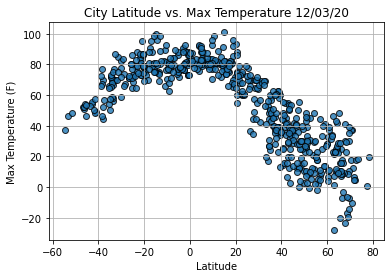

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

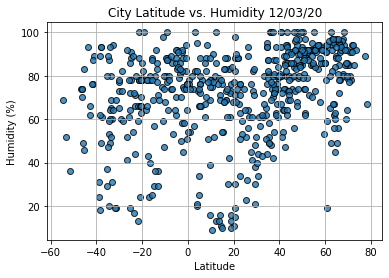

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

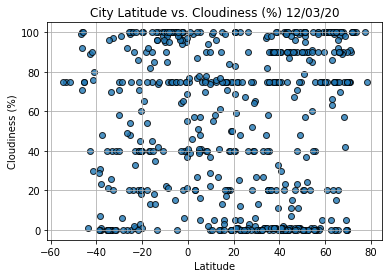

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

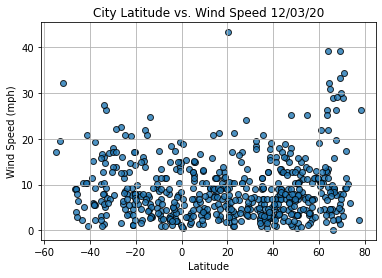

In [42]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [43]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
index13 = city_data_df.loc[13]

City                   Kaitangata
Country                        NZ
Date          2020-12-03 15:16:26
Lat                        -46.28
Lng                        169.85
Max Temp                    51.01
Humidity                       70
Cloudiness                    100
Wind Speed                      4
Name: 13, dtype: object

In [46]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2020-12-03 15:16:09,3.07,172.79,80.76,82,20,13.38
1,Longyearbyen,SJ,2020-12-03 15:15:39,78.22,15.64,19.40,67,75,26.40
2,Rochegda,RU,2020-12-03 15:17:13,62.80,43.25,21.90,97,86,7.34
3,Tiznit,MA,2020-12-03 15:17:14,29.58,-9.50,63.90,52,27,10.71
4,Malakal,SS,2020-12-03 15:16:52,9.53,31.66,92.70,16,0,4.21
...,...,...,...,...,...,...,...,...,...
569,Shache,CN,2020-12-03 15:18:20,38.42,77.24,22.73,87,100,3.98
570,Nikel,RU,2020-12-03 15:18:20,69.41,30.22,35.60,80,75,39.15
571,Moose Jaw,CA,2020-12-03 15:18:16,50.40,-105.53,26.60,79,0,3.36
572,Ransang,PH,2020-12-03 15:18:21,8.96,117.58,80.38,77,94,2.33


In [47]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2020-12-03 15:16:09,3.07,172.79,80.76,82,20,13.38
1,Longyearbyen,SJ,2020-12-03 15:15:39,78.22,15.64,19.40,67,75,26.40
2,Rochegda,RU,2020-12-03 15:17:13,62.80,43.25,21.90,97,86,7.34
3,Tiznit,MA,2020-12-03 15:17:14,29.58,-9.50,63.90,52,27,10.71
4,Malakal,SS,2020-12-03 15:16:52,9.53,31.66,92.70,16,0,4.21


In [56]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

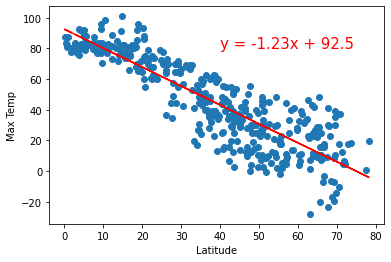

In [57]:
 # Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(40,80))


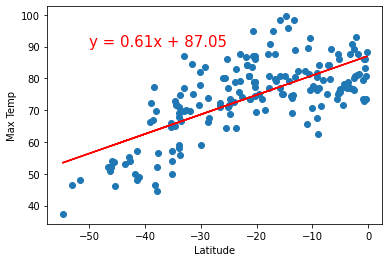

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

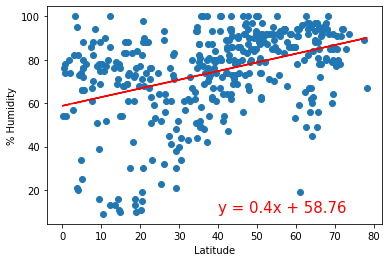

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

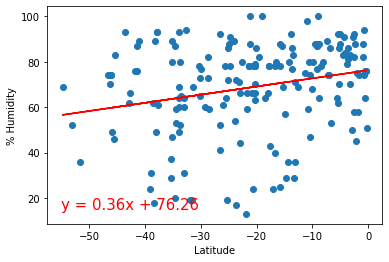

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,15))

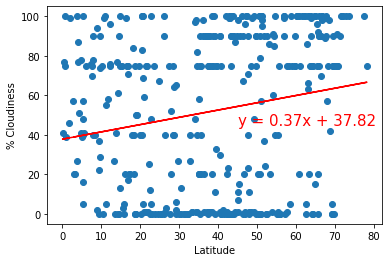

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(45,45))

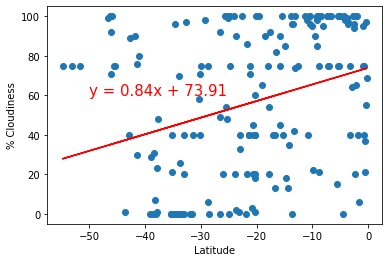

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

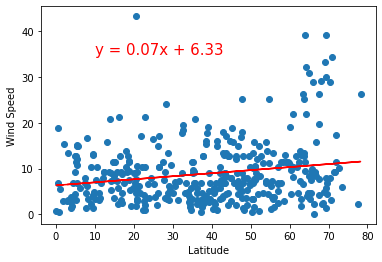

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,35))

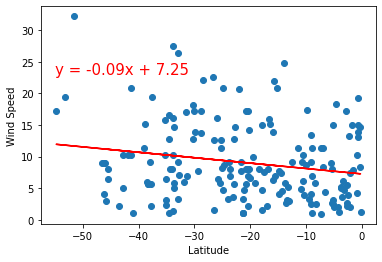

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,23))
